# time spectrum fit

time spectrum of a ~3 µm stainless steel foil

95% enriched in 57Fe

a small line broadening needs to be included, here done via an isomer distribution

In [1]:
import nexus as nx
import numpy as np
import matplotlib.pyplot as plt

## load data

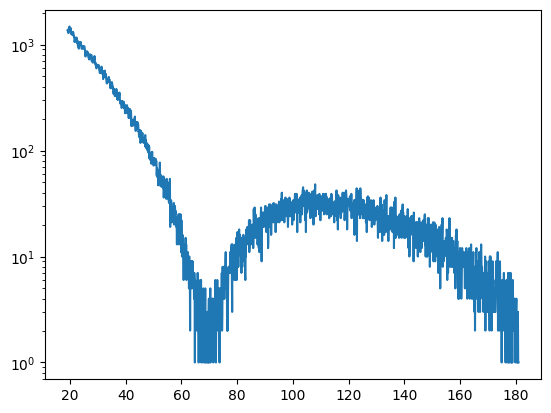

In [2]:
time_data, intensity_data = nx.data.Load('time_spectrum_stainless_steel_foil.dat',
                                         x_index = 1,
                                         intensity_index = 2,
                                         x_start = 19,
                                         x_stop = 191, 
                                         intensity_threshold=0.1
                                        )

plt.semilogy(time_data, intensity_data)
plt.show()

# sample

In [3]:
dist = nx.lib.distribution.Gaussian(points = 51,
                                    fwhm = nx.Var(0.1, min = 1e-6, max = 0.8, fit = True, id = "gauss fwhm")
                                   )

site = nx.Hyperfine(# isomer = 0,
                    # magnetic_field = 0,
                    # quadrupole = 0,
                    isomer_dist = dist,
                    isotropic = True)

SSt = nx.Material.Template(nx.lib.material.SS_enriched)

SSt.hyperfine_sites = [site]

layer_SSt = nx.Layer(id = "SSt layer",
                     material = SSt,
                     thickness = nx.Var(3000, min = 2500, max = 3500, fit = True, id = "thickness"),
#                     thickness_fwhm = nx.Var(100, min= 0, max = 600, fit = True, id = "thickness fwhm")
                     )

sample = nx.Sample(id = "sample",
                   layers = [layer_SSt],
                   geometry = "f"         # forward scattering geometry
                   )


## experiment

In [4]:
beam = nx.Beam()
beam.LinearSigma()

exp = nx.Experiment(beam = beam,
                    objects = [sample],
                    isotope = nx.lib.moessbauer.Fe57)

## time spectrum

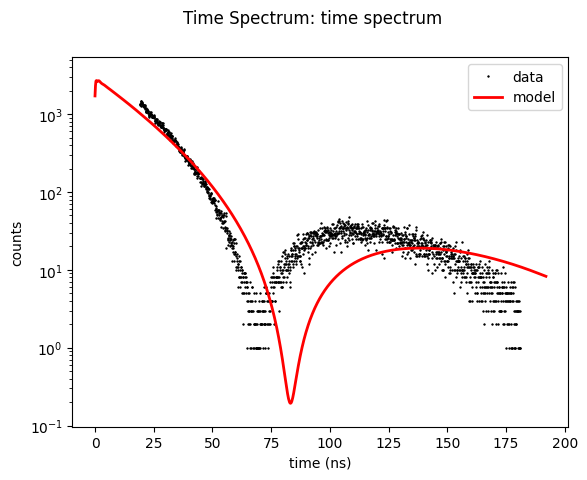

In [5]:
time_spectrum = nx.TimeSpectrum(id = "time spectrum",
                                experiment=exp,
                                time_length=600,
                                time_step=0.2,
                                # max_detuning=400,
                                # electronic=False,
                                time_data = time_data,
                                intensity_data = intensity_data,
                                scaling=nx.Var(2000, min = 1e-16, max = 1e8, fit = True, id = "scaling"),
                                # background=0.0,
                                # offset=0.0
                                # resolution=0.7,
#                                distribution_points=31,   # uncomment if thickness_fwhm is used
                                bunch_spacing = 192.1,  # PETRA III spacing in timing mode
                                # residual= nx.lib.residual.Sqrt(),
                                # fft_window='auto',
                                # coherence=False
                               )

time_spectrum()

time_spectrum.Plot()

## fit

In [6]:
fit = nx.Fit(id = "time spectrum fit",
             measurements = [time_spectrum]
            )

fit.options.file_output = False

fit.Evaluate()


Run Fit instance with id: time spectrum fit 

Starting fit with 1 measurement data set(s) and 3 fit parameter(s):

  no. |                           id |       initial value |              min |              max
    0 |                      scaling |                2000 |            1e-16 |            1e+08
    1 |                    thickness |                3000 |             2500 |             3500
    2 |                   gauss fwhm |                 0.1 |            1e-06 |              0.8

Using 0 equality constraint(s) on parameter(s):

Using 0 inequality constraint(s).


Calling ceres solver with fit method LevMar

Ceres Solver Report: Iterations: 4, Initial cost: 3.546737e+03, Final cost: 2.435848e+02, Termination: CONVERGENCE

Gradient error analysis.


Fit performed with algorithm:
LevMar
Error analysis:
Gradient

Using 3 fit parameter(s):

  no. |                           id |          fit value |   +/- std dev | initial value |          min |          max
    0 |     

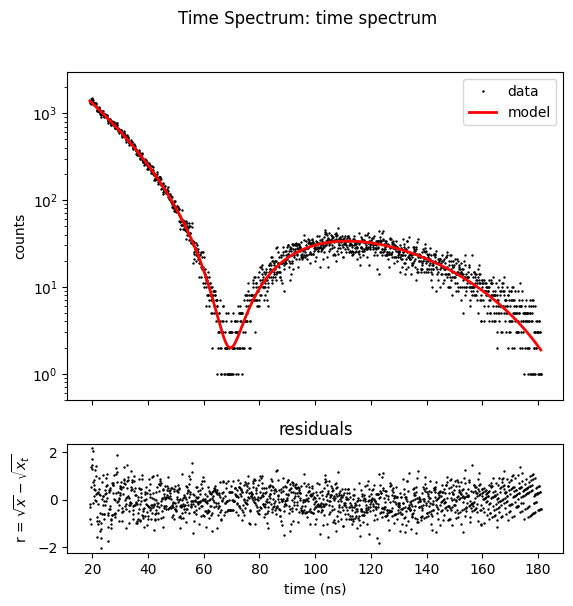

In [7]:
time_spectrum.Plot()